In [ ]:
!apt update
!apt install ffmpeg libsm6 libxext6 -y

!pip3 install --upgrade pip
!pip3 install opencv-python

!pip3 install imutils

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian-security buster/updates InRelease
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Fetched 56.6 kB in 0s (192 kB/s)



All packages are up to date.



libsm6 is already the newest version (2:1.2.3-1).
libxext6 is already the newest version (2:1.3.3-1+b2).
ffmpeg is already the newest version (7:4.1.9-0+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [ ]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import argparse
import imutils
import math

In [ ]:
def get_contours_and_disp(filepath):
    img = cv2.imread(filepath)

    Ig = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    shape = Ig.shape

    _,It = cv2.threshold(Ig,0,255,cv2.THRESH_OTSU)

    sx = cv2.Sobel(It,cv2.CV_32F,1,0)

    sy = cv2.Sobel(It,cv2.CV_32F,0,1)

    m = cv2.magnitude(sx,sy)

    m = cv2.normalize(m,None,0.,255.,cv2.NORM_MINMAX,cv2.CV_8U)

    #m = cv2.ximgproc.thinning(m,None,cv2.ximgproc.THINNING_GUOHALL)

    contours, _ = cv2.findContours(m,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #print(len(contours))
    disp = cv2.merge((m,m,m))
    disp = cv2.drawContours(disp,contours,-1,color=(255,0,0)) 

    return contours, disp, shape

    #plt.imshow(disp)
    #plt.show()

In [ ]:
def get_and_plot_contour_centers(contours, disp, plot=True):

    p_xs = np.array([])
    p_ys = np.array([])

    all_xs = []
    all_ys = []

    for cont in contours:
        cont = cont.tolist()
        for point in cont:
            for xy in point:
                p_xs = np.append(p_xs, xy[0])
                p_ys = np.append(p_ys, xy[1])

        all_xs.append(p_xs)
        all_ys.append(p_ys)

        p_xs = np.array([])
        p_ys = np.array([])


    cc_x = []
    for cont_x_points in all_xs:
        cc_x.append(round(np.mean(cont_x_points)))

    cc_y = []
    for cont_y_points in all_ys:
        cc_y.append(round(np.mean(cont_y_points)))

    if plot:
        graph, (plot1) = plt.subplots(1, 1)
        plot1.imshow(disp)
        plot1.scatter(cc_x, cc_y)
        plt.show()

    return (list(zip(cc_x, cc_y)))

In [ ]:
def diagnose_dyslexia_with_countour_centers(filepath):
    contours, disp, shape = get_contours_and_disp(filepath)
    cc = get_and_plot_contour_centers(contours, disp, plot=True)

    cc = np.asarray(cc)

    index = np.argsort(cc[:, 0], axis = 0)

    #print (index)
    #print (cc)

    cc_sorted = cc[index]

    #print (f'cc_sorted: {cc_sorted}')
    #print ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

    diffs = np.diff(cc_sorted, axis=0)
    
    #print (f'diffs: {diffs}')
    #print ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    #For future reference, don't use magic numbers :)
    rows_to_delete = np.where(np.isclose(diffs[:,0], 0, atol=5))

    #print (rows_to_delete)

    diffs_important = np.delete(diffs, rows_to_delete, axis = 0)
    
    #print (f'diffs_important: {diffs_important}')
    #print ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    change_in_diffs_important = np.diff(diffs_important, axis=0)

    #print (f'change_in_diffs_important: {change_in_diffs_important}')
    #print ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
    plt.plot(diffs_important[:,0])
    plt.title('Change in x position')
    plt.show()

    plt.plot(change_in_diffs_important[:,0])
    plt.title('Acceleration in x position')
    plt.show()

    #print(len(np.where(change_in_diffs_important[:,0] > np.abs(20))[0]))
    print (type(shape))
    #If number of times that the length in betwen each character is greater than 
    #a magic number 20 is greater than 1/4 of the spaces between letters,
    #dyslexia
    change_thresh = round(shape[1]**0.5)
    num_inconsistencies = len(np.where(np.abs(change_in_diffs_important[:,0]) > change_thresh)[0])

    #if len(np.where(change_in_diffs_important[:,0] > round(np.abs((shape[1])**0.5)[0]))) > len(diffs_important) // 4:
    if num_inconsistencies > (len(diffs_important) // 4):
        return 1
    
    else:
        return 0



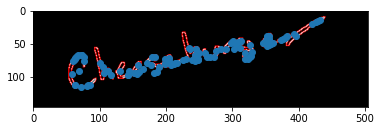

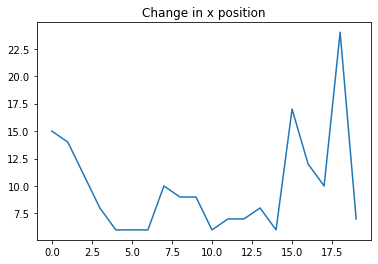

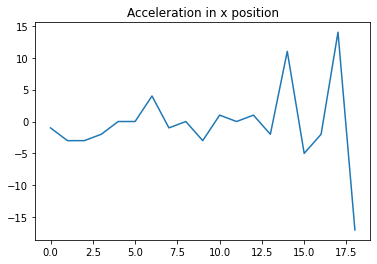

<class 'tuple'>
No Dyslexia


In [ ]:
#npreds = []
p = diagnose_dyslexia_with_countour_centers('cheese3.png')
#npreds.append(diagnose_dyslexia_with_countour_centers('sentence.png'))

num_to_diagnosis = {0: 'No Dyslexia', 1: 'Dyslexia'}
#preds=[]
#for pred in npreds:
#    preds.append(num_to_diagnosis[pred])
#print (preds)
print (num_to_diagnosis[p])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc6a7e1b-737f-4fb9-9883-7c054c57915b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>